## This notebook will show how to build dendogram using the csipy python library to perform clustering 

Import Statement

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist, squareform

plt.rcParams['figure.figsize'] = [9, 5]
sns.set_theme()

Building a dendogram in a subset of iris dataset

In [3]:
# Load iris dataset
iris = load_iris()

# Format iris dataset as dataframe
iris_df = pd.DataFrame(
    iris['data'],
    columns=iris['feature_names']
)

# Load iris labels
iris_df['label'] = iris['target_names'][iris['target']]

# Keep only petal length and petal width
iris_df_sub = iris_df.filter(
    items=[
        'petal length (cm)', 
        'petal width (cm)', 
        'label'
    ]
)

# Subset dataset to two columns for easier 
# visual inspection
numer_cols = ['petal length (cm)', 'petal width (cm)']

# Drop duplicates that have appeared
# due to removing columns
iris_df_sub = iris_df_sub.drop_duplicates().reset_index(drop=True)

# Reduce dataset for easier dendrogram preview
iris_df_sub = iris_df.groupby('label').sample(3, random_state=44).reset_index(drop=True)

In [4]:
iris_df_sub

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,4.9,3.6,1.4,0.1,setosa
1,4.6,3.4,1.4,0.3,setosa
2,4.6,3.2,1.4,0.2,setosa
3,5.9,3.2,4.8,1.8,versicolor
4,5.5,2.3,4.0,1.3,versicolor
5,6.0,2.7,5.1,1.6,versicolor
6,6.4,2.8,5.6,2.2,virginica
7,6.7,2.5,5.8,1.8,virginica
8,6.8,3.2,5.9,2.3,virginica


Text(0.5, 1.0, 'Iris subset')

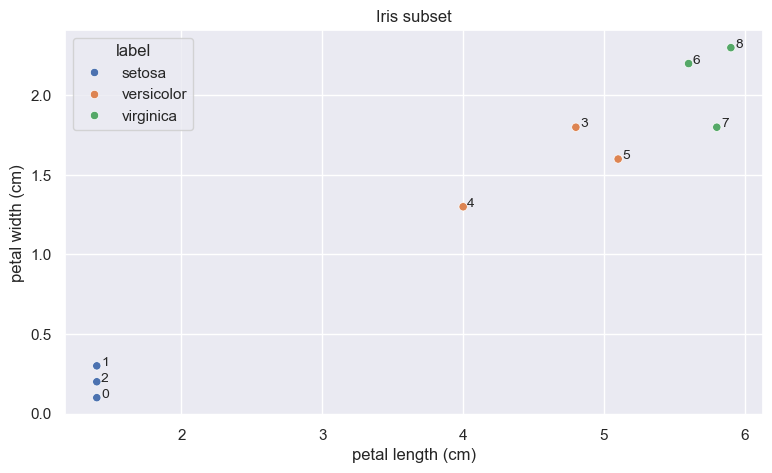

In [5]:
# Plot 'petal length (cm)' and 'petal width (cm)' with
# cluster info and point idx
sns.scatterplot(iris_df_sub, x='petal length (cm)', y='petal width (cm)',hue='label')
for idx in iris_df_sub.index:
    plt.text(
        x=iris_df_sub.loc[idx,'petal length (cm)']+0.03, 
        y=iris_df_sub.loc[idx,'petal width (cm)'], 
        s=str(idx), 
        size='small'
    )

plt.title('Iris subset')

In [6]:
linkage_matrix = linkage(iris_df_sub[numer_cols], method='ward')
linkage_matrix

array([[ 1.        ,  2.        ,  0.1       ,  2.        ],
       [ 0.        ,  9.        ,  0.17320508,  3.        ],
       [ 6.        ,  8.        ,  0.31622777,  2.        ],
       [ 3.        ,  5.        ,  0.36055513,  2.        ],
       [ 7.        , 11.        ,  0.5228129 ,  3.        ],
       [ 4.        , 12.        ,  1.19023807,  3.        ],
       [13.        , 14.        ,  2.16948535,  6.        ],
       [10.        , 15.        ,  8.2723099 ,  9.        ]])

The `linkage` function is used in hierarchical clustering to compute a linkage matrix. This matrix is a representation of the hierarchical clustering of a dataset. 


1. **Input:**
   - `iris_df_sub[numer_cols]`: This is the subset of your DataFrame that contains only the numerical columns used for clustering.
   - `method='ward'`: The Ward method minimizes the total within-cluster variance. It is a popular choice for hierarchical clustering.

2. **Output:**
   The `linkage` function returns a **linkage matrix**, a NumPy array where each row corresponds to a merge operation in the hierarchical clustering process.

   For an input dataset with \( n \) samples, the linkage matrix has \( n-1 \) rows and 4 columns:
   - **Column 1**: The index of the first cluster merged.
   - **Column 2**: The index of the second cluster merged.
   - **Column 3**: The distance between the two clusters merged.
   - **Column 4**: The number of data points in the newly formed cluster.

### Usage:
- You can use the linkage matrix to create a dendrogram with `scipy.cluster.hierarchy.dendrogram` to visualize the hierarchical clustering.



In [7]:
linkage_df = pd.DataFrame(linkage_matrix, columns=['First group', 'Second group', 'Distance', 'Size'])
linkage_df['New id'] = np.arange(linkage_df.shape[0]) + linkage_df.shape[0]+1

linkage_df

,First group,Second group,Distance,Size,New id
0,1.0,2.0,0.100000,2.0,9
1,0.0,9.0,0.173205,3.0,10
2,6.0,8.0,0.316228,2.0,11
3,3.0,5.0,0.360555,2.0,12
4,7.0,11.0,0.522813,3.0,13
5,4.0,12.0,1.190238,3.0,14
6,13.0,14.0,2.169485,6.0,15
7,10.0,15.0,8.272310,9.0,16


In [9]:
#Plotting a simple dendogram for this linkage_matrix

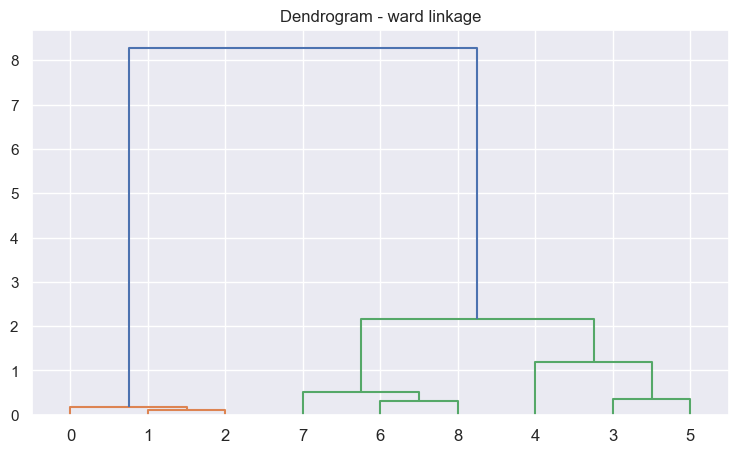

In [8]:
plt.figure()
dendrogram(linkage_matrix, color_threshold=4)
plt.title('Dendrogram - ward linkage')
plt.show()

In [ ]:
#Compute the cophenet distance metric 
cophenet(linkage_matrix, pdist(iris_df_sub[numer_cols].to_numpy()))[0]

0.9451792902977969

The `cophenet` function in hierarchical clustering is used to calculate the cophenetic correlation coefficient between the linkage matrix and the pairwise distances between the observations. This coefficient measures how well the hierarchical clustering tree (dendrogram) preserves the pairwise distances between the original data points.


- **Linkage Matrix**: Represents the hierarchical clustering result with the pairs of clusters being merged and the distance between them.
- **Pdist**: Computes the pairwise distances between observations in the dataset. These distances serve as the "true" distances that you'd expect the clustering to reflect.

The cophenetic correlation coefficient is a value between -1 and 1, where:
- **1** indicates a perfect correlation (the hierarchical clustering reflects the pairwise distances exactly).
- **0** indicates no correlation.
- **Negative values** indicate an inverse correlation (the clustering poorly represents the true distances).


- `linkage_matrix` is the linkage matrix obtained from hierarchical clustering (with the 'ward' method in this case).
- `pdist(iris_df_sub[numer_cols].to_numpy())` computes the pairwise distances between the observations in the dataset.
- `cophenet(linkage_matrix, pairwise_distances)` returns the cophenetic correlation coefficient, which you store in the variable `cophenetic_corr`.



In [11]:
# Compute the cophenetic correlation coefficient
cophenetic_corr, _ = cophenet(linkage_matrix, pdist(iris_df_sub[numer_cols].to_numpy()))
cophenetic_corr

0.9451792902977969

In [12]:
def cophenetic_corr(linkage_matrix, data_mtx, distance_measure='euclidean'):
    
    if distance_measure != 'precomputed':
        cop_corr = cophenet(
            linkage_matrix, 
            pdist(data_mtx, metric=distance_measure),
        )[0]
        
    else:
        cop_corr = cophenet(
            linkage_matrix, 
            squareform(data_mtx),
        )[0]
        
    print(
        'Cophenetic correlation : {}'.format(cop_corr)
    )
    

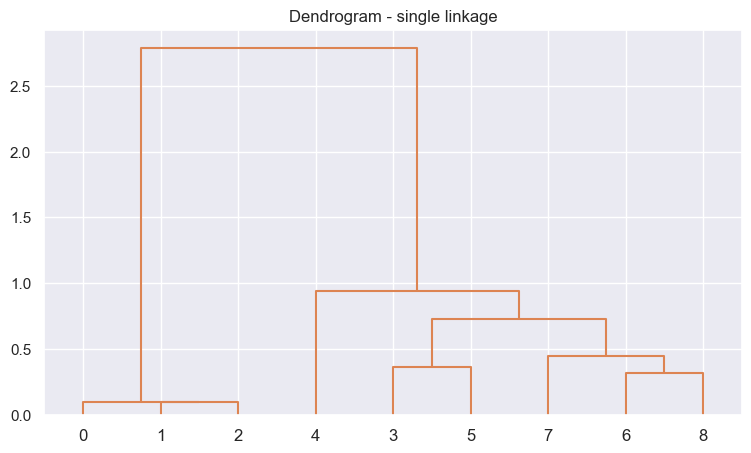

In [13]:
linkage_matrix = linkage(iris_df_sub[numer_cols], method='single')

plt.figure()
dendrogram(linkage_matrix, color_threshold=4)
plt.title('Dendrogram - single linkage')
plt.show()

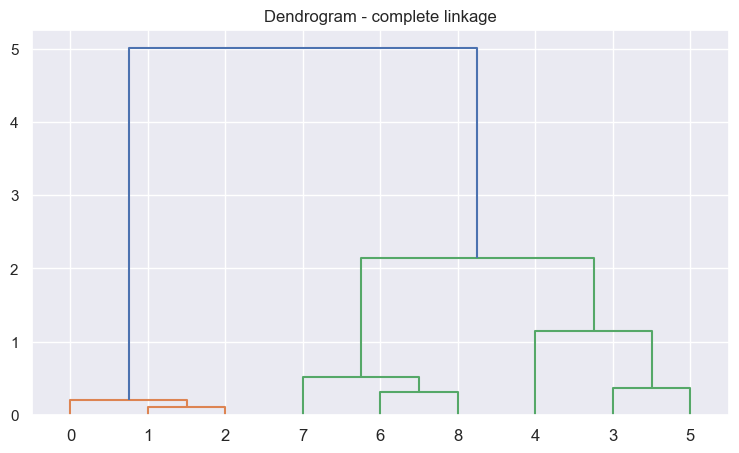

In [14]:
linkage_matrix = linkage(iris_df_sub[numer_cols], method='complete')

plt.figure()
dendrogram(linkage_matrix, color_threshold=4)
plt.title('Dendrogram - complete linkage')
plt.show()

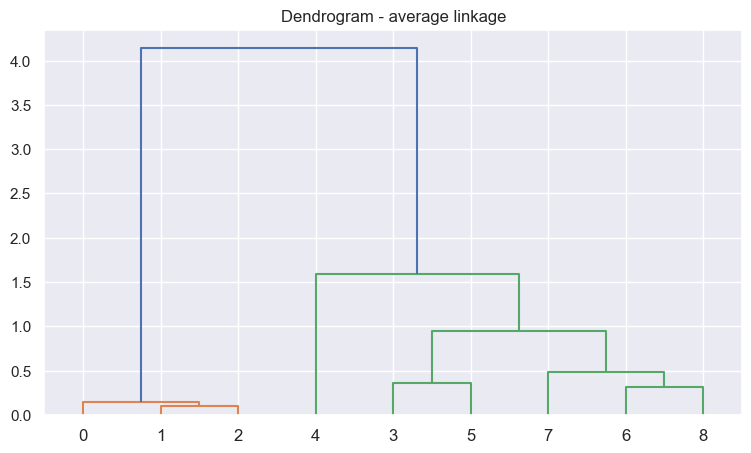

In [15]:
linkage_matrix = linkage(iris_df_sub[numer_cols], method='average')

plt.figure()
dendrogram(linkage_matrix, color_threshold=4)
plt.title('Dendrogram - average linkage')
plt.show()

# Building dendogram on the full iris dataset

In [16]:
# Load iris dataset
iris_df = pd.DataFrame(
    iris['data'],
    columns=iris['feature_names']
)

numer_cols = iris_df.columns

# Load iris labels
iris_df['label'] = iris['target_names'][iris['target']]

Text(0.5, 1.0, 'Scatterplot with true label')

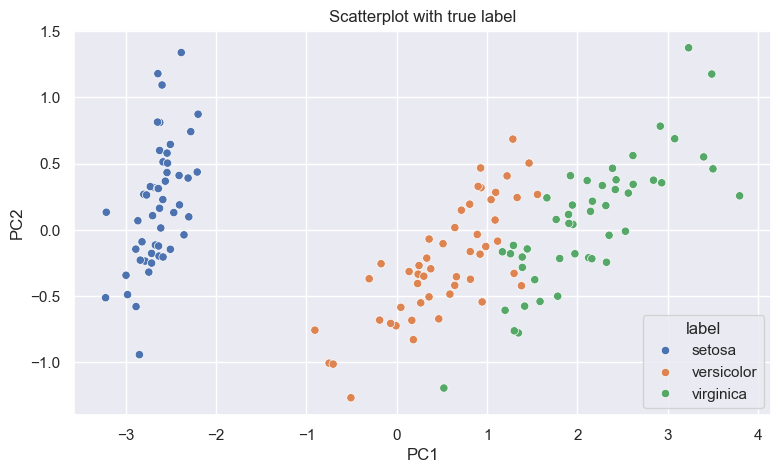

In [17]:
# Run PCA so we can show dataset in 2D space
pca = PCA(n_components=2)
pca_data = pca.fit_transform(iris_df[numer_cols].values)
pca_data = np.column_stack([pca_data, iris_df['label'].values])
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'label'])

# Plot and colour based on reference label
sns.scatterplot(pca_df, x='PC1', y='PC2', hue='label')
plt.title('Scatterplot with true label')

Cophenetic correlation : 0.8638786773076584


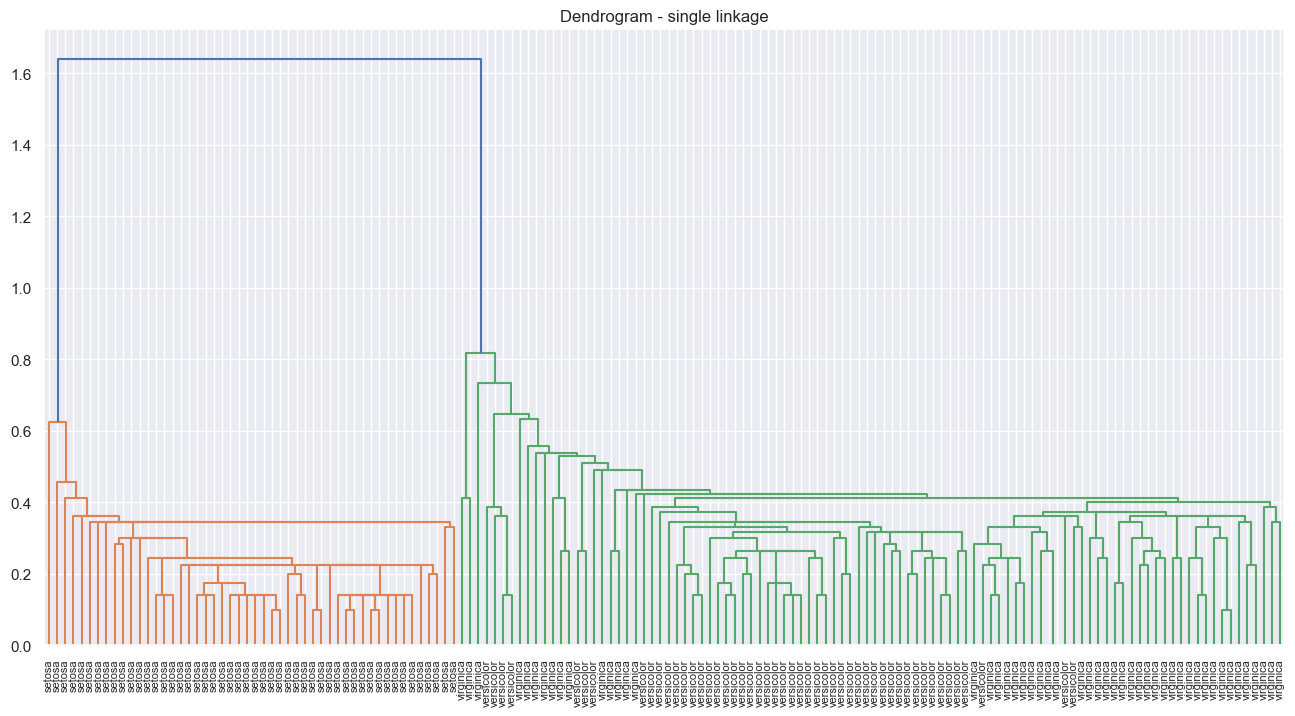

In [18]:
linkage_matrix = linkage(iris_df[numer_cols], method='single')

cophenetic_corr(linkage_matrix, iris_df[numer_cols].to_numpy())

plt.figure(figsize=(16,8))
dendrogram(linkage_matrix, color_threshold=1, labels=iris_df['label'].to_numpy(), leaf_font_size=8)
plt.title('Dendrogram - single linkage')
plt.show()

Text(0.5, 1.0, 'Scatterplot with true label')

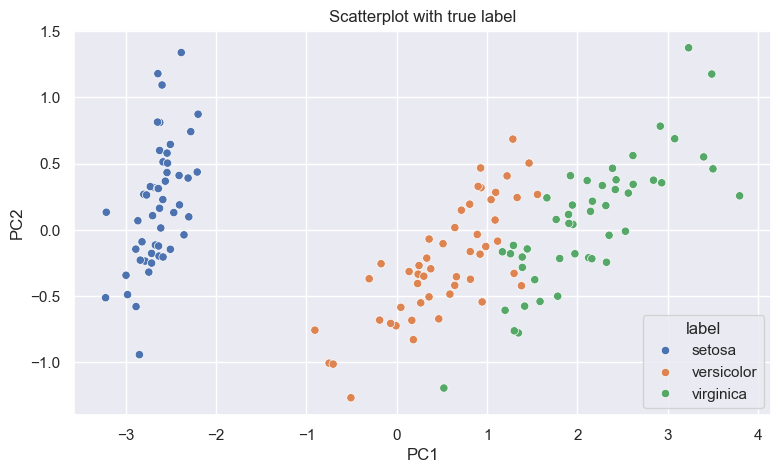

In [19]:
# Plot and colour based on reference label
sns.scatterplot(pca_df, x='PC1', y='PC2', hue='label')
plt.title('Scatterplot with true label')

Cophenetic correlation : 0.7269856836284624


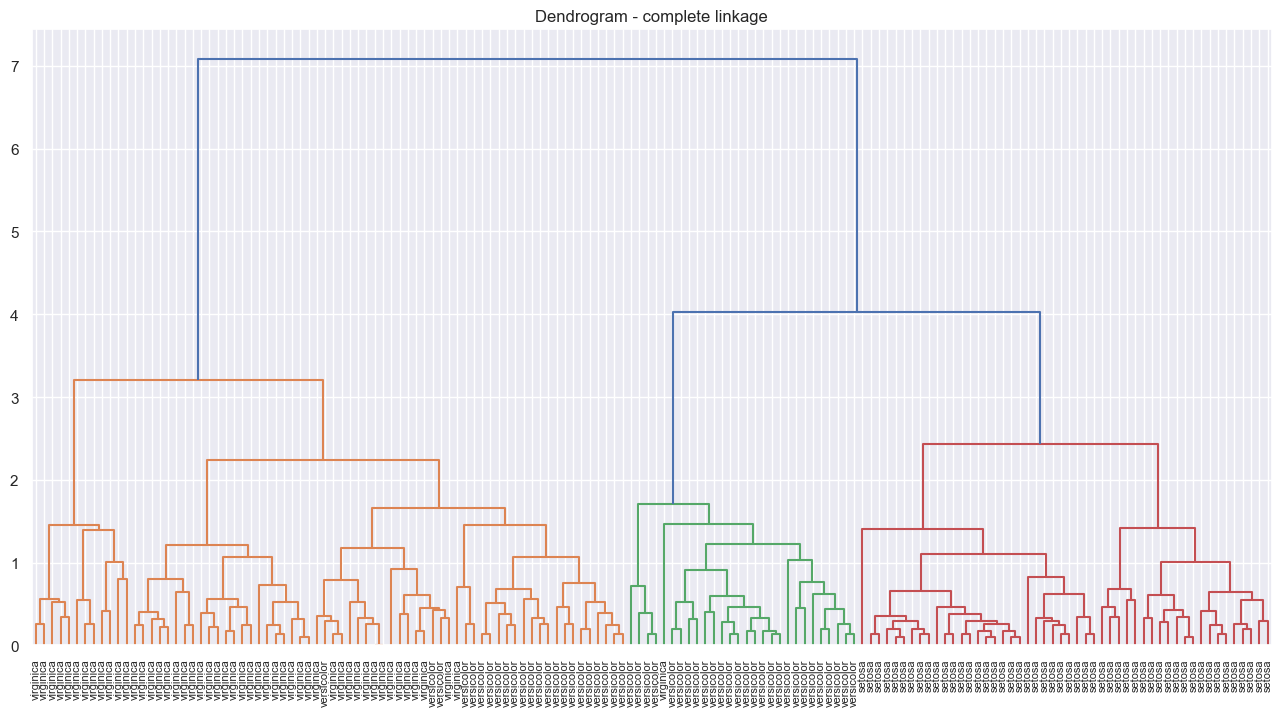

In [20]:
linkage_matrix = linkage(iris_df[numer_cols], method='complete')
cophenetic_corr(linkage_matrix, iris_df[numer_cols].to_numpy())

plt.figure(figsize=(16,8))
dendrogram(linkage_matrix, color_threshold=4, labels=iris_df['label'].to_numpy(), leaf_font_size=8)
plt.title('Dendrogram - complete linkage')
plt.show()

Cophenetic correlation : 0.8769561464741983


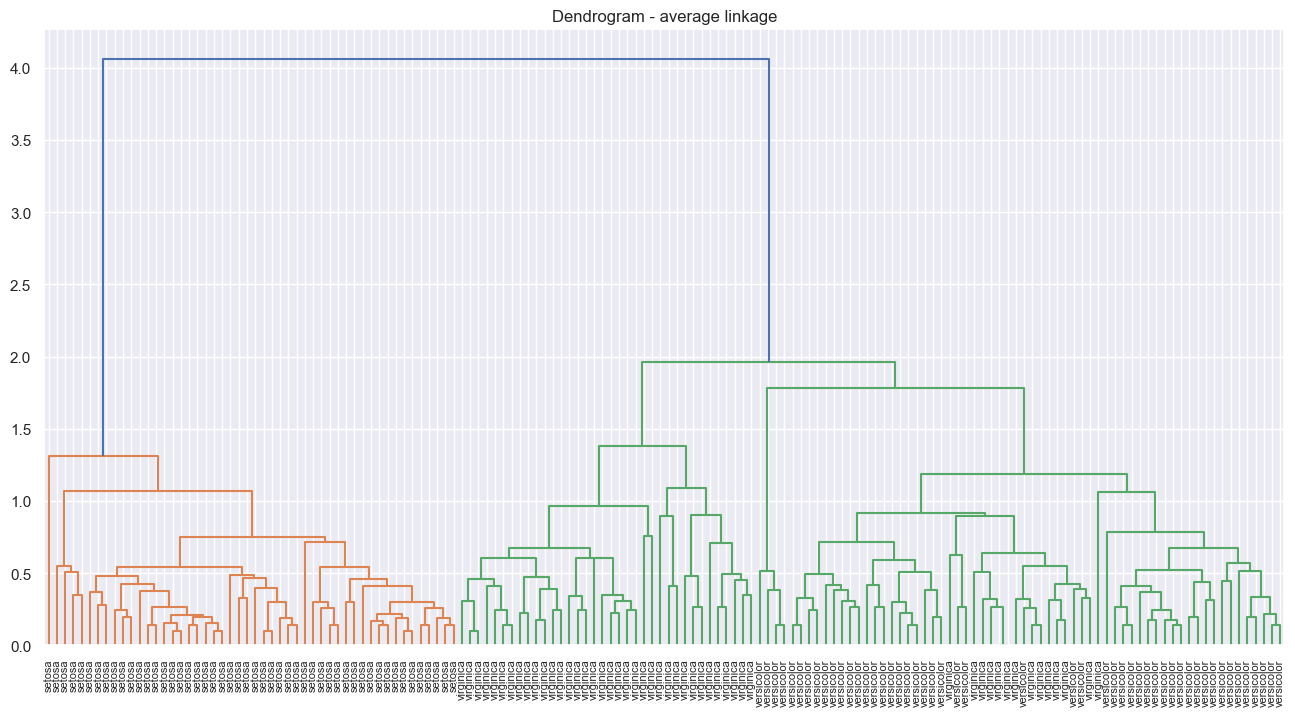

In [21]:
linkage_matrix = linkage(iris_df[numer_cols], method='average')
cophenetic_corr(linkage_matrix, iris_df[numer_cols].to_numpy())

plt.figure(figsize=(16,8))
dendrogram(linkage_matrix, color_threshold=4, labels=iris_df['label'].to_numpy(), leaf_font_size=8)
plt.title('Dendrogram - average linkage')
plt.show()

Cophenetic correlation : 0.8728283153305715


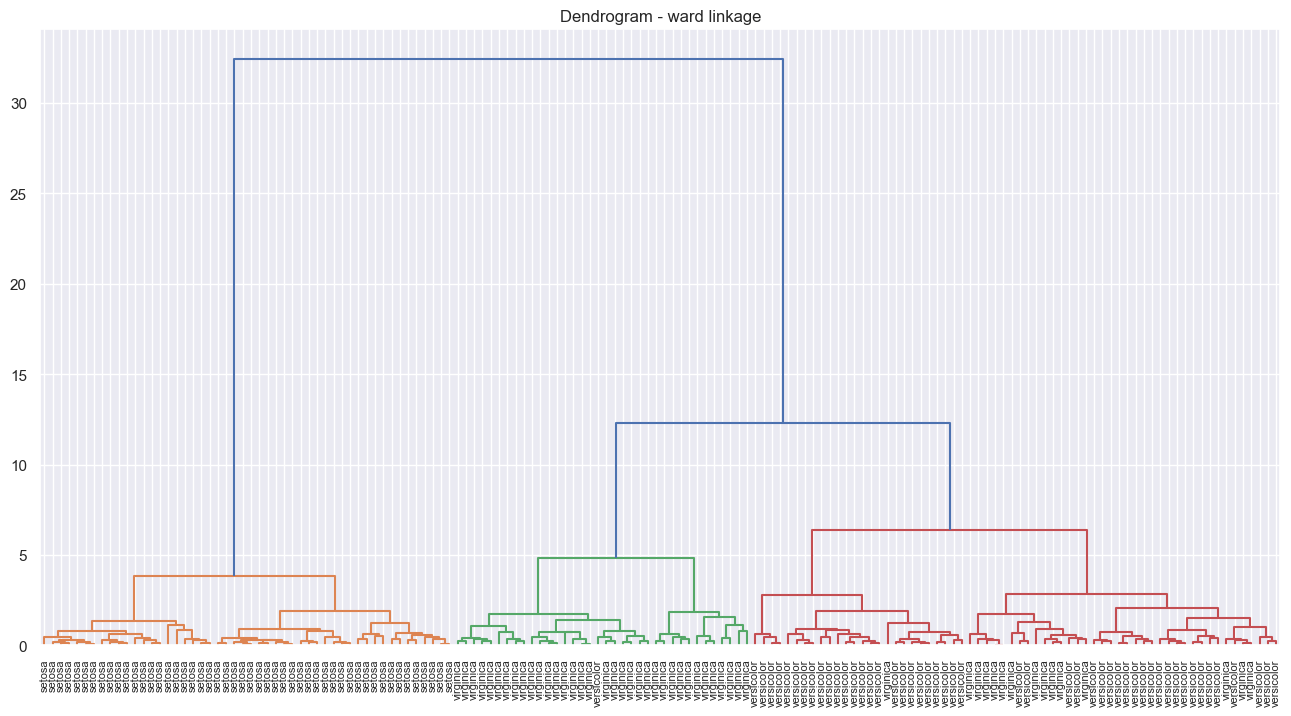

In [22]:
linkage_matrix = linkage(iris_df[numer_cols], method='ward')
cophenetic_corr(linkage_matrix, iris_df[numer_cols].to_numpy())

plt.figure(figsize=(16,8))
dendrogram(linkage_matrix, color_threshold=10, labels=iris_df['label'].to_numpy(), leaf_font_size=8)
plt.title('Dendrogram - ward linkage')
plt.show()

## Dendogram Truncation for bether visualization when we have a lot of data

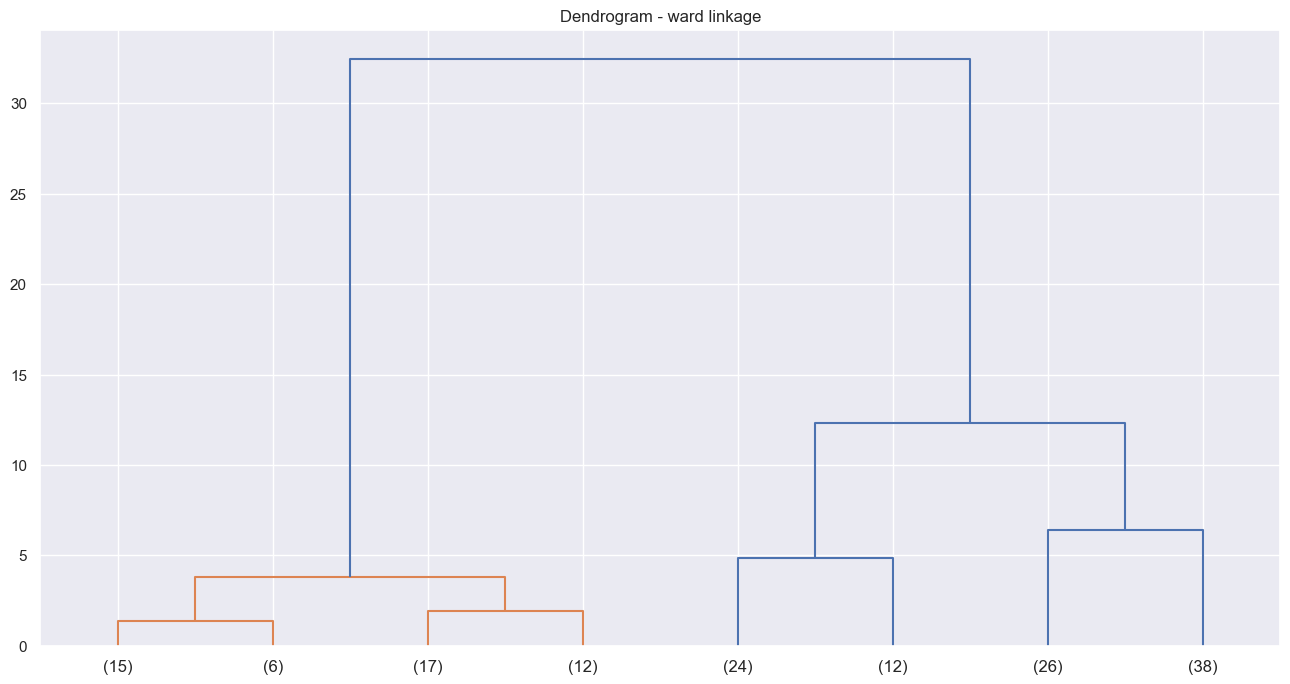

In [23]:
# Truncated dendrogram
linkage_matrix = linkage(iris_df[numer_cols], method='ward')

plt.figure(figsize=(16,8))
dendrogram(linkage_matrix, color_threshold=4, truncate_mode="level", p=2)
plt.title('Dendrogram - ward linkage')
plt.show()

The code you provided generates a **truncated dendrogram** based on hierarchical clustering using the **ward linkage method**. A truncated dendrogram only shows the first `p` levels of the hierarchy, making it easier to interpret when dealing with large datasets.


1. **`linkage(iris_df[numer_cols], method='ward')`**: 
   - This performs hierarchical clustering on the numerical columns of `iris_df` using the Ward linkage method, which minimizes the variance within clusters.
   
2. **`plt.figure(figsize=(16, 8))`**:
   - Sets the figure size for the plot to make it larger and more readable.

3. **`dendrogram(linkage_matrix, color_threshold=4, truncate_mode="level", p=2)`**:
   - **`linkage_matrix`**: The linkage matrix produced by the hierarchical clustering.
   - **`color_threshold=4`**: Sets the threshold for coloring clusters. Clusters with distances above this threshold will be colored differently from those below it.
   - **`truncate_mode="level"`**: This truncates the dendrogram at a specified hierarchical level, showing the first `p` levels of the tree.
   - **`p=2`**: This argument specifies the number of levels to show in the dendrogram, i.e., the dendrogram will be truncated to only show the first two levels of the hierarchy.


### Result:
The resulting dendrogram show only the first two levels of the hierarchical clustering, making it easier to interpret for large datasets. This method helps identify where clusters start to form while ignoring lower-level splits that may not be significant.